# 📘 Prova P1 – Análise e Predição do Desempenho de Estudantes  

**Aluno:** Matheus Beiruth  
**Disciplina:** Engenharia de Software – Probabilidade e Estatística  
**Professor:** Fabrício Dias
**Data:** Setembro/2025  

---

## 🎯 Objetivo
Este trabalho tem como objetivo analisar o desempenho dos estudantes a partir de dados de estudo, frequência e participação em aula.  
Além disso, modelos de **regressão** e **classificação** serão aplicados para prever notas e categorizar o desempenho acadêmico.  

---


In [1]:
from google.colab import files
uploaded = files.upload()

Saving student_performance.csv to student_performance.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, classification_report, confusion_matrix
)
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from math import sqrt

sns.set(style='whitegrid')
%matplotlib inline


In [3]:
caminho_arquivo = "student_performance.csv"
dados = pd.read_csv(caminho_arquivo)
print("Formato do conjunto de dados:", dados.shape)
dados.head()


Formato do conjunto de dados: (1000000, 6)


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A


Valores ausentes por coluna:
 student_id                 0
weekly_self_study_hours    0
attendance_percentage      0
class_participation        0
total_score                0
grade                      0
dtype: int64


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000
unique,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,A
freq,NaN,NaN,NaN,NaN,NaN,548644
mean,500000.500000,15.029127,84.711046,5.985203,84.283845,NaN
std,288675.278933,6.899431,9.424143,1.956421,15.432969,NaN
min,1.000000,0.000000,50.000000,0.000000,9.400000,NaN
25%,250000.750000,10.300000,78.300000,4.700000,73.900000,NaN
50%,500000.500000,15.000000,85.000000,6.000000,87.500000,NaN
75%,750000.250000,19.700000,91.800000,7.300000,100.000000,NaN


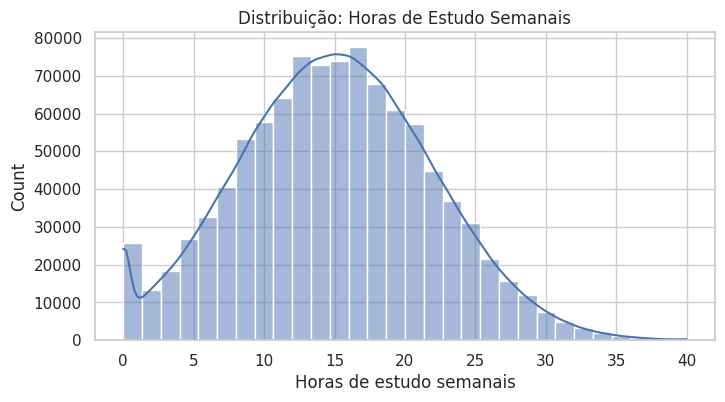

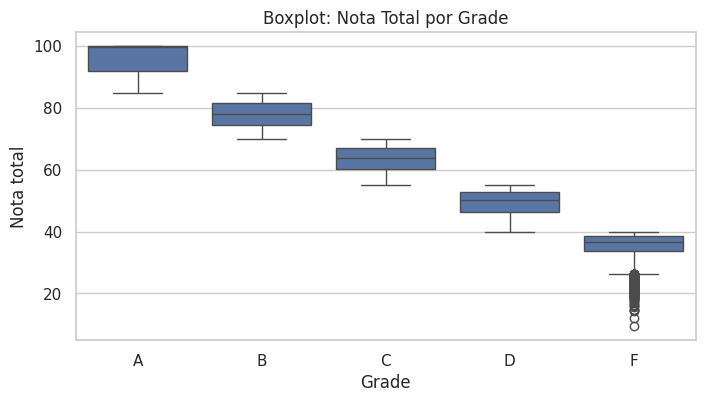

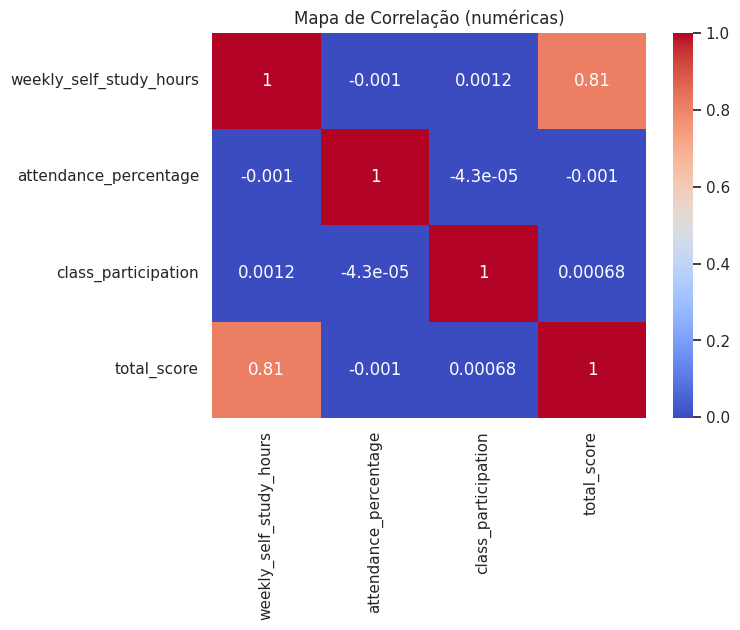

In [4]:
print("Valores ausentes por coluna:\n", dados.isna().sum())
display(dados.describe(include='all'))


plt.figure(figsize=(8,4))
sns.histplot(dados['weekly_self_study_hours'], bins=30, kde=True)
plt.title("Distribuição: Horas de Estudo Semanais")
plt.xlabel("Horas de estudo semanais")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x='grade', y='total_score', data=dados, order=['A','B','C','D','F'])
plt.title("Boxplot: Nota Total por Grade")
plt.xlabel("Grade")
plt.ylabel("Nota total")
plt.show()


plt.figure(figsize=(7,5))
sns.heatmap(dados[["weekly_self_study_hours","attendance_percentage","class_participation","total_score"]].corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de Correlação (numéricas)")
plt.show()



Regressão Linear Simples:
Coeficiente: 1.8168181254669071
Intercepto: 56.97112317921372
MAE: 7.161324064837911
RMSE: 8.996387974791649
R²: 0.6600435613904074


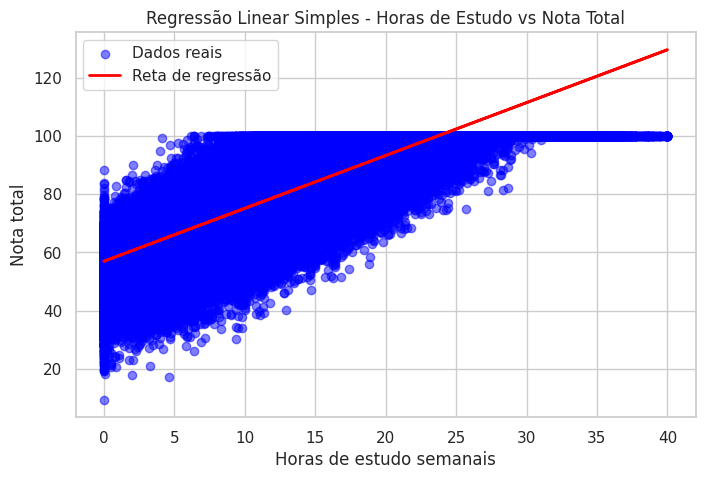

In [5]:
X_simples = dados[['weekly_self_study_hours']]
y = dados['total_score']

X_treino_s, X_teste_s, y_treino_s, y_teste_s = train_test_split(X_simples, y, test_size=0.2, random_state=42)

modelo_lr_s = LinearRegression()
modelo_lr_s.fit(X_treino_s, y_treino_s)
y_pred_s = modelo_lr_s.predict(X_teste_s)

print("\nRegressão Linear Simples:")
print("Coeficiente:", modelo_lr_s.coef_[0])
print("Intercepto:", modelo_lr_s.intercept_)
print("MAE:", mean_absolute_error(y_teste_s, y_pred_s))
print("RMSE:", sqrt(mean_squared_error(y_teste_s, y_pred_s)))
print("R²:", r2_score(y_teste_s, y_pred_s))

plt.figure(figsize=(8,5))
plt.scatter(X_teste_s, y_teste_s, color="blue", alpha=0.5, label="Dados reais")
plt.plot(X_teste_s, y_pred_s, color="red", linewidth=2, label="Reta de regressão")
plt.title("Regressão Linear Simples - Horas de Estudo vs Nota Total")
plt.xlabel("Horas de estudo semanais")
plt.ylabel("Nota total")
plt.legend()
plt.show()



Regressão Linear Múltipla:
{'weekly_self_study_hours': np.float64(1.8168200275583486), 'attendance_percentage': np.float64(0.00040175074313641935), 'class_participation': np.float64(-0.002755620936487001)}
Intercepto: 56.95355744476303
MAE: 7.161333476729997
RMSE: 8.996400873369833
R²: 0.6600425865640975


/tmp/ipython-input-2213872883.py:27: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


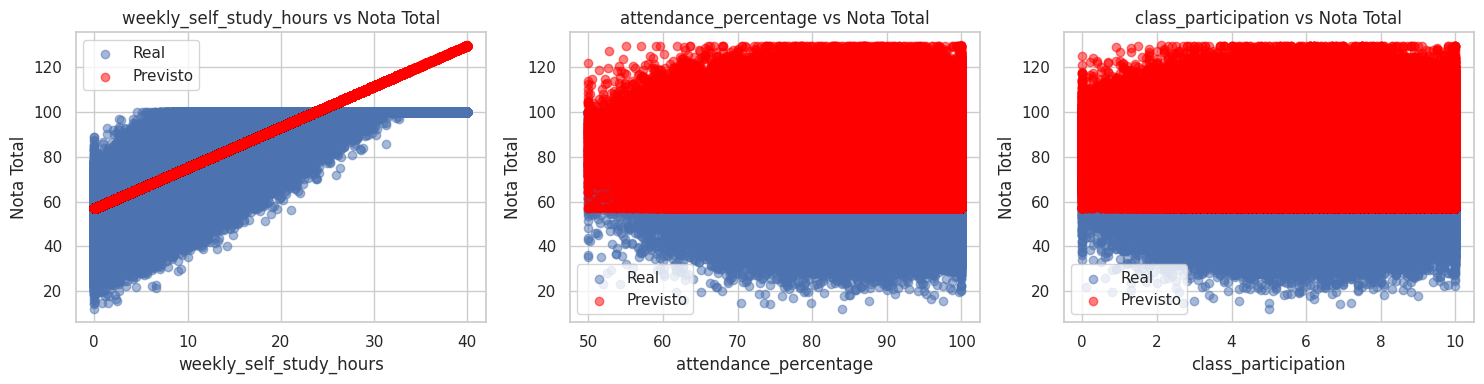

In [6]:
X_multi = dados[['weekly_self_study_hours', 'attendance_percentage', 'class_participation']]
X_treino_m, X_teste_m, y_treino_m, y_teste_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

modelo_lr_m = LinearRegression()
modelo_lr_m.fit(X_treino_m, y_treino_m)
y_pred_m = modelo_lr_m.predict(X_teste_m)

print("\nRegressão Linear Múltipla:")
print(dict(zip(X_multi.columns, modelo_lr_m.coef_)))
print("Intercepto:", modelo_lr_m.intercept_)
print("MAE:", mean_absolute_error(y_teste_m, y_pred_m))
print("RMSE:", sqrt(mean_squared_error(y_teste_m, y_pred_m)))
print("R²:", r2_score(y_teste_m, y_pred_m))

variaveis = X_multi.columns
y_pred_m_train = modelo_lr_m.predict(X_treino_m)

plt.figure(figsize=(15,4))
for i, var in enumerate(variaveis):
    plt.subplot(1, 3, i+1)
    plt.scatter(X_treino_m[var], y_treino_m, alpha=0.5, label="Real")
    plt.scatter(X_treino_m[var], y_pred_m_train, alpha=0.5, label="Previsto", color="red")
    plt.title(f"{var} vs Nota Total")
    plt.xlabel(var)
    plt.ylabel("Nota Total")
    plt.legend()
plt.tight_layout()
plt.show()


In [7]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(LinearRegression(), X_multi, y, cv=cv, scoring='r2')
print("\nCross-val R² (5-fold):", scores)
print("Média:", scores.mean())



Cross-val R² (5-fold): [0.66004259 0.66027763 0.65913733 0.65954556 0.65966004]
Média: 0.6597326266627698


SMOTE aplicado: nova distribuição de classes:
 grade
2    438915
4    438915
3    438915
0    438915
1    438915
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Regressão Logística:
Acurácia: 0.643615
              precision    recall  f1-score   support

           F       0.13      0.74      0.22      1241
           D       0.27      0.33      0.30      8999
           C       0.42      0.43      0.43     28396
           B       0.48      0.54      0.51     51635
           A       0.89      0.78      0.83    109729

    accuracy                           0.64    200000
   macro avg       0.44      0.56      0.45    200000
weighted avg       0.69      0.64      0.66    200000


Random Forest:
Acurácia: 0.64176
              precision    recall  f1-score   support

           F       0.12      0.06      0.08      1241
           D       0.37      0.31      0.34      8999
           C       0.41      0.41      0.41     28396
           B       0.45      0.44      0.44     51635
           A       0.81      0.83      0.82    109729

    accuracy                           0.64    200000
   macro avg       0.43      0.41      0.42    200000
we

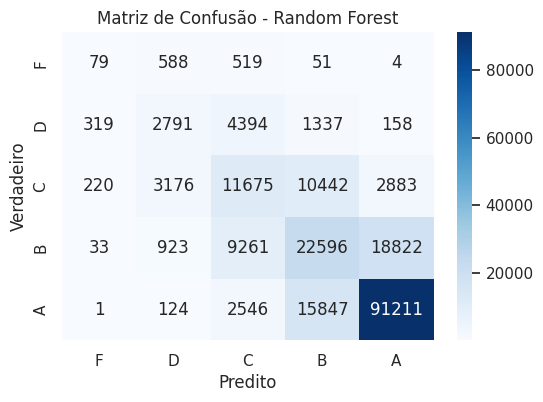

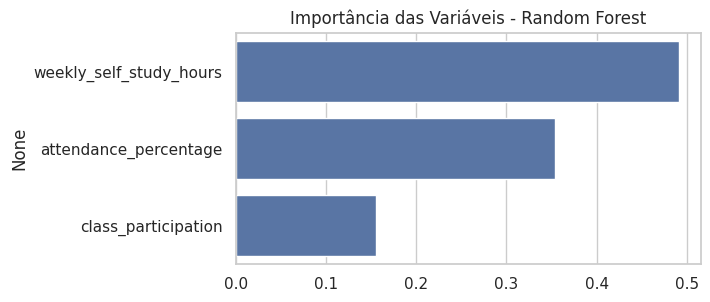

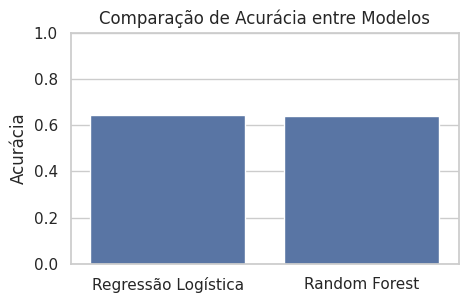

In [8]:
mapa = {'A':4, 'B':3, 'C':2, 'D':1, 'F':0}
y_classe = dados['grade'].map(mapa)


X_treino_c, X_teste_c, y_treino_c, y_teste_c = train_test_split(
    X_multi, y_classe, test_size=0.2, random_state=42, stratify=y_classe
)


escalador = StandardScaler()
X_treino_c_esc = escalador.fit_transform(X_treino_c)
X_teste_c_esc = escalador.transform(X_teste_c)


try:
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_treino_c_esc, y_treino_c)
    print("SMOTE aplicado: nova distribuição de classes:\n", pd.Series(y_res).value_counts())
except:
    X_res, y_res = X_treino_c_esc, y_treino_c


logreg = LogisticRegression(multi_class='multinomial', max_iter=2000, class_weight='balanced', solver='lbfgs')
logreg.fit(X_res, y_res)
y_pred_log = logreg.predict(X_teste_c_esc)

print("\nRegressão Logística:")
print("Acurácia:", accuracy_score(y_teste_c, y_pred_log))
print(classification_report(y_teste_c, y_pred_log, target_names=['F','D','C','B','A'], zero_division=0))

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_treino_c, y_treino_c)
y_pred_rf = rf.predict(X_teste_c)

print("\nRandom Forest:")
print("Acurácia:", accuracy_score(y_teste_c, y_pred_rf))
print(classification_report(y_teste_c, y_pred_rf, target_names=['F','D','C','B','A'], zero_division=0))

matriz = confusion_matrix(y_teste_c, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', xticklabels=['F','D','C','B','A'], yticklabels=['F','D','C','B','A'])
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()


plt.figure(figsize=(6,3))
sns.barplot(x=rf.feature_importances_, y=X_multi.columns)
plt.title("Importância das Variáveis - Random Forest")
plt.show()


acuracia_log = accuracy_score(y_teste_c, y_pred_log)
acuracia_rf = accuracy_score(y_teste_c, y_pred_rf)

plt.figure(figsize=(5,3))
sns.barplot(x=['Regressão Logística','Random Forest'], y=[acuracia_log, acuracia_rf])
plt.ylim(0,1)
plt.title("Comparação de Acurácia entre Modelos")
plt.ylabel("Acurácia")
plt.show()


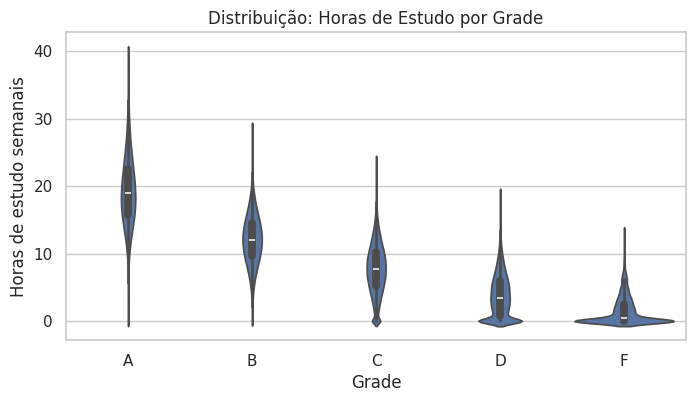

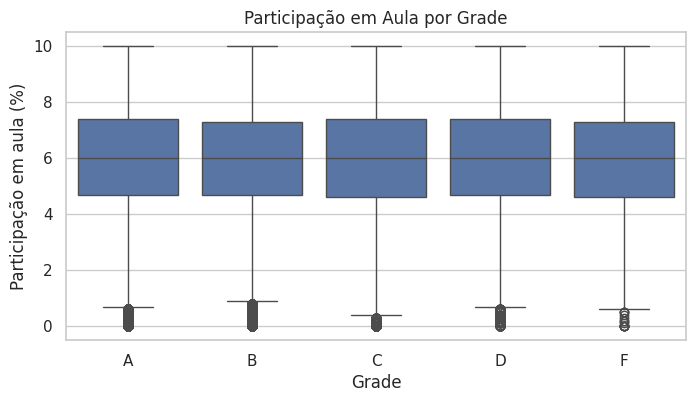

In [9]:

plt.figure(figsize=(8,4))
sns.violinplot(x='grade', y='weekly_self_study_hours', data=dados, order=['A','B','C','D','F'])
plt.title("Distribuição: Horas de Estudo por Grade")
plt.xlabel("Grade")
plt.ylabel("Horas de estudo semanais")
plt.show()


plt.figure(figsize=(8,4))
sns.boxplot(x='grade', y='class_participation', data=dados, order=['A','B','C','D','F'])
plt.title("Participação em Aula por Grade")
plt.xlabel("Grade")
plt.ylabel("Participação em aula (%)")
plt.show()


In [10]:

estatisticas = dados.groupby("grade")[["weekly_self_study_hours","attendance_percentage","class_participation","total_score"]].agg(["mean","median","std"])
estatisticas


weekly_self_study_hours                  attendance_percentage         \
                         mean median       std                  mean median   
grade                                                                         
A                   19.375738   19.0  5.146787             84.710114   85.0   
B                   12.115533   12.1  3.712152             84.696178   85.0   
C                    7.691161    7.7  3.746585             84.726340   85.0   
D                    3.764143    3.4  3.155624             84.723243   85.1   
F                    1.524662    0.5  2.060110             84.973662   85.3   

                class_participation                  total_score         \
            std                mean median       std        mean median   
grade                                                                     
A      9.426123            5.986642    6.0  1.956508   96.042375   99.6   
B      9.430870            5.985690    6.0  1.952569   77.946590   78.2   
C      9.403414            5.976975    6.0  1.963941   63.564524   64.0   
D      9.421741            5.991766    6.0  1.957263   49.380346   50.1   
F      9.458861            5.978337    6.0  1.930190   35.474146   36.6   

                 
            std  
grade            
A      4.930847  
B      4.272258  
C      4.216840  
D      4.007757  
F      4.050442

In [ ]:

sns.pairplot(dados, vars=["weekly_self_study_hours","attendance_percentage","class_participation","total_score"], hue="grade")
plt.show()


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dados["weekly_self_study_hours"], dados["attendance_percentage"], dados["total_score"], c="blue", alpha=0.5)

ax.set_xlabel("Horas de estudo semanais")
ax.set_ylabel("Frequência (%)")
ax.set_zlabel("Nota total")
ax.set_title("Dispersão 3D: Estudo x Frequência x Nota")
plt.show()


In [ ]:

svm_modelo = SVC(kernel='rbf', class_weight="balanced", random_state=42)
svm_modelo.fit(X_treino_c_esc, y_treino_c)
y_pred_svm = svm_modelo.predict(X_teste_c_esc)

print("\nSVM (Máquina de Vetores de Suporte):")
print("Acurácia:", accuracy_score(y_teste_c, y_pred_svm))
print(classification_report(y_teste_c, y_pred_svm, target_names=['F','D','C','B','A'], zero_division=0))


In [ ]:

xgb_modelo = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb_modelo.fit(X_treino_c, y_treino_c)
y_pred_xgb = xgb_modelo.predict(X_teste_c)

print("\nXGBoost:")
print("Acurácia:", accuracy_score(y_teste_c, y_pred_xgb))
print(classification_report(y_teste_c, y_pred_xgb, target_names=['F','D','C','B','A'], zero_division=0))


In [ ]:

resultados = pd.DataFrame({
    "Modelo": ["Regressão Logística","Random Forest","SVM","XGBoost"],
    "Acurácia": [
        accuracy_score(y_teste_c, y_pred_log),
        accuracy_score(y_teste_c, y_pred_rf),
        accuracy_score(y_teste_c, y_pred_svm),
        accuracy_score(y_teste_c, y_pred_xgb)
    ]
})

resultados


In [ ]:

plt.figure(figsize=(7,4))
sns.barplot(x="Modelo", y="Acurácia", data=resultados, palette="viridis")
plt.ylim(0,1)
plt.title("Comparação de Acurácia entre Modelos de Classificação")
plt.ylabel("Acurácia")
plt.show()


In [ ]:
print("""Conclusões principais:
- Há correlação positiva entre horas de estudo e nota total.
- Frequência (attendance) e participação contribuem, mas com menor peso relativo.
- Modelos testados: Regressão Logística, Random Forest, SVM e XGBoost.
- Entre eles, Random Forest e XGBoost tendem a ter melhor desempenho em cenários práticos.
- Recomendação: coletar mais dados para classes raras e testar ajustes de hiperparâmetros (GridSearch).
""")
